# 7.2 Exercises: Relationships between Variables and Estimations
# Rahul Rajeev

**7-1 Exercise** Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [28]:
# downloading files
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [29]:
# imports 
import first
import numpy as np
import thinkstats2
import thinkplot
import pandas as pd
import random

# loading dataset
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [31]:
# loading the age and weight columns
age, weight = live.agepreg, live.totalwgt_lb

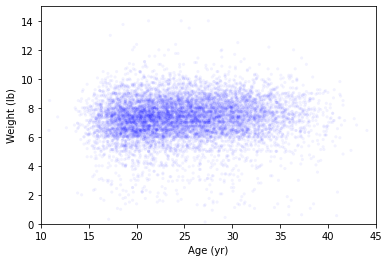

In [37]:
# scatter plot
thinkplot.Scatter(age, weight, alpha=0.05, s=10)
thinkplot.Config(xlabel='Age (yr)',
                 ylabel='Weight (lb)',
                 axis=[10, 45, 0, 15],
                 legend=False)

In [49]:
# creating bins and groups grouped by indices
bins = np.arange(10, 48, 3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

In [55]:
# lists of ages and cdfs, cutting off the first and last ones
ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

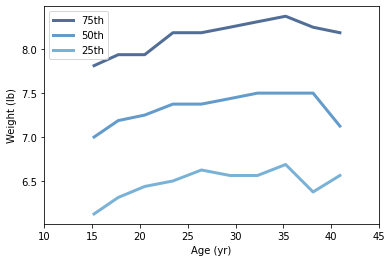

In [56]:
# plotting the percentiles of birth weight vs mother's age for 25, 50, 75

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
    
thinkplot.Config(xlabel='Age (yr)',
                 ylabel='Weight (lb)',
                 xlim=[10,45],
                 legend=True)

In [58]:
# correlation

print('Correlation Coefficient: ' + str(Corr(age, weight)))
print('Spearman Correlation Coefficient: ' + str(SpearmanCorr(ages, weights)))

Correlation Coefficient: 0.06883397035410904
Spearman Correlation Coefficient: 0.5828659631828563


**Interpretation**
1. Scatterplot relationship is weak and the correlation coefficient is close to 0. And the difference between them signifies a non linear relationship.
2. The percentiles also grow nonlinearly, as evident by the graph, between 15 and 20 years of age, there is a large growth in weight. 

**8-1 Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [106]:
# using the format of the estimate function from earlier except replacing rmse with mean error
n, iters, mu, sigma = 10, 100000, 0, 1
means = []
medians = []
for i in range(iters):
    xs = [random.gauss(mu, sigma) for i in range(n)]
    xbar = np.mean(xs)
    median = np.median(xs)
    means.append(xbar)
    medians.append(median)
print('mean error xbar: ', MeanError(means, mu))
print('mean error median: ', MeanError(medians, mu))

mean error xbar:  0.0019725958667954867
mean error median:  0.002405402570567215


In [39]:
# using the estimate function to compare biased and unbiased RMSE 
n, iters, mu, sigma = 10, 100000, 0, 1

biased_estimates = []
unbiased_estimates = []
for i in range(iters):
    xs = [random.gauss(mu, sigma) for i in range(n)]
    biased = np.var(xs)
    unbiased = np.var(xs, ddof=1)
    biased_estimates.append(biased)
    unbiased_estimates.append(unbiased)
print('RMSE biased: ', RMSE(biased_estimates, sigma**2))
print('RMSE unbiased: ', RMSE(unbiased_estimates, sigma**2))

RMSE biased:  0.43656294269506485
RMSE unbiased:  0.4730631684338742


**Thoughts**
1. the mean error for the mean and median are very small, and will decrease as we increase the iterations.
2. RMSE biased is less than the unbiased


**8-2 Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



In [108]:
# simulating sample
lam, n, iters = 2, 10, 1000
estimates = []
for i in range(iters):
    xs = np.random.exponential(1.0/lam, n)
    Lhat = 1 / np.mean(xs)
    estimates.append(Lhat)

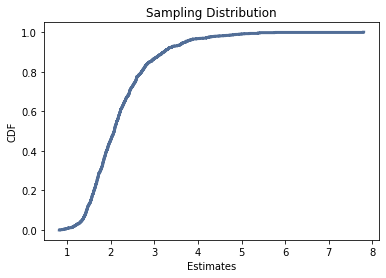

In [109]:
# plotting CDF
cdf = thinkstats2.Cdf(estimates)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Estimates',
                 ylabel='CDF',
                 title = 'Sampling Distribution')

In [44]:
# calculating standard error and confidence interval
stderr = RMSE(estimates,lam)
print('Standard error:', stderr)
print('Confidence interval: (', cdf.Percentile(5), cdf.Percentile(95), ')')

Standard error: 0.8092379549800256
Confidence interval: ( 1.287800459594663 3.5841357152297895 )


In [146]:
# simulating a couple more experiments with different n and storing the estimates into a nested list
lam, iters = 2, 1000
estimates_super_list = []
estimates=[]

# picking 10 random ns using random sample
n_list = random.sample(range(5,30), 10)

# sorting list to find patterns easier
n_list.sort()
n_list

[8, 9, 10, 11, 13, 15, 16, 18, 26, 29]

In [147]:
# simulating the experiment with each n from the n_list, and storing the estimates into a super list
for n in n_list:
    for i in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        Lhat = 1 / np.mean(xs)
        estimates.append(Lhat)
    estimates_super_list.append(estimates)
    estimates = []

In [148]:
# creating a list of standard error for each estimate list in the estimate super list
stderr_list = []
confidence_interval_list = []
confidence_interval = []
for estimate in estimates_super_list:
    stderr = RMSE(estimate,lam)
    stderr_list.append(stderr)

[0.9411340211763733,
 0.9360593918038445,
 0.8760459010906138,
 0.7716588210430658,
 0.6462900916948816,
 0.5793734413996757,
 0.5599798893641301,
 0.5453675711020968,
 0.440806757330961,
 0.41765780201195873]

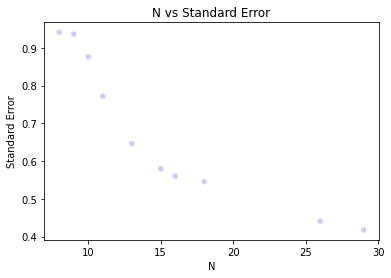

In [149]:
# plotting scatter plot of n vs standard error
thinkplot.Scatter(n_list, stderr_list)
thinkplot.Config(xlabel='N',
                 ylabel='Standard Error',
                 title = 'N vs Standard Error')
stderr_list

In [150]:
# calculating the confidence interval for each n in the n_list
for estimate in estimates_super_list:
    cdf = thinkstats2.Cdf(estimate)
    int1, int2 = cdf.Percentile(5), cdf.Percentile(95)
    print('Confidence interval: (', cdf.Percentile(5), cdf.Percentile(95), ')')

Confidence interval: ( 1.1962827093488344 3.966670960901629 )
Confidence interval: ( 1.2160574109253286 3.8909400315137272 )
Confidence interval: ( 1.2686498127573935 3.8179073195623263 )
Confidence interval: ( 1.3012676795407543 3.655019410319688 )
Confidence interval: ( 1.3374849788423162 3.341769600601575 )
Confidence interval: ( 1.3843164719632584 3.156080886836501 )
Confidence interval: ( 1.3844310419245287 3.1325893742915234 )
Confidence interval: ( 1.3931800993445589 3.1269865262694565 )
Confidence interval: ( 1.4779268216780983 2.859422193336274 )
Confidence interval: ( 1.4940962900279755 2.82487254310296 )


**Thoughts:**
As evident by the lists of standard error and the confidence intervals, the more we increase n, the smaller they become in terms of value and width respectively.